In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\frac{\delta f(x_1,x_2)}{\delta x_1} = 20 x_1$

$\frac{\delta f(x_1,x_2)}{\delta x_2} = 2 x_2$

$\nabla f(x_1,x_2) = (\frac{\delta f(x_1,x_2)}{\delta x_1}, \frac{\delta f(x_1,x_2)}{\delta x_2}) = (20 x_1, 2 x_2)$

In [2]:
def plot_grad(xs):
    xs_arr = np.array(xs)

    plt.figure(figsize=(20,15))
    x1 = np.linspace(-0.5, 0.5, 100)
    x2 = np.linspace(-0.5, 1.5, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y = 10*X1**2 + X2**2
    levels = [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0]

    plt.contourf(X1, X2, Y, levels, alpha=0.7)
    plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
    plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
    for i in range(len(xs_arr) - 1):
        plt.annotate('', xy=xs_arr[i + 1, :], xytext=xs_arr[i, :],
                     arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                     va='center', ha='center')

    CS = plt.contour(X1, X2, Y, levels, linewidths=1,colors='black')
    plt.clabel(CS, inline=1, fontsize=8)
    plt.title("Contour Plot of Gradient Descent")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

Approximate solution is (-0.00002, 0.00165). Found in 20 iterations.


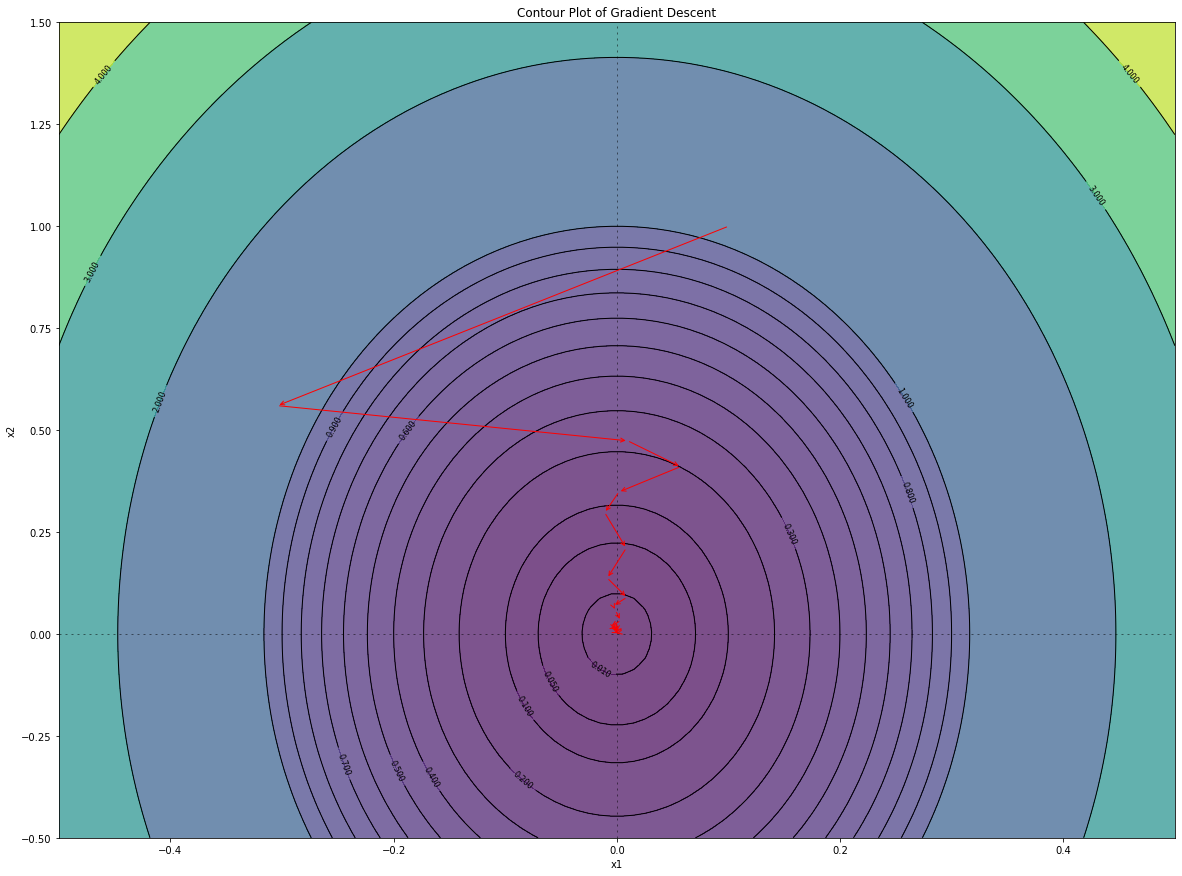

In [4]:
def function_5(x):
    return (10*x[0]**2 + x[1]**2).item()

def function_5_derivative(x):
    return np.array([20*x[0], 2*x[1]])

def gradient_step(t, x_old):
    grad = function_5_derivative(x_old)
    x_new = x_old - t*grad
#     print(x_new)
    return x_new

def gradient_step_momentum(t, x_old, beta, z_old):
    grad = function_5_derivative(x_old)
    z = grad + beta*z_old
    x_new = x_old - t*z
    return x_new, z

def gradient_method(acc, x0):
    z_old =  x_old = x0
    t = 0.2 #0.01 for fradient descent with momentum and fixed step #0.2 for gradient descent with calculated step 
    #0.09 for gradient descent with fixes step
    beta = 0.2#0.8 for fradient descent with momentum and fixed step
    iter_count = 0
    
    while True:
        iter_count+=1
        xs.append(x_old)
#         x_new = gradient_step(t, x_old)
        x_new, z_old = gradient_step_momentum(t, x_old, beta, z_old) 
        t=calc_step(x_new, x_old)
        if np.linalg.norm(x_new - x_old) <= acc:
            xs.append(x_new)
            return x_new, iter_count
            break
        x_old = x_new
        
def calc_step(x_new, x_old):
    return np.dot((x_new-x_old).T,(function_5_derivative(x_new) - function_5_derivative(x_old)))/np.linalg.norm(function_5_derivative(x_new) - function_5_derivative(x_old))**2
        
            
x0=np.array([[0.1], [1]])
acc = 0.001
xs=[]

solution, iter_count = gradient_method(acc, x0)
print("Approximate solution is (%.5f," %solution[0], "%.5f)." %solution[1], "Found in %s iterations." %iter_count)

plot_grad(xs)


## Task (b)

$H(x)=\begin{pmatrix}\frac{\delta^2 f(x_1,x_2)}{\delta x_1^2} & \frac{\delta^2 f(x_1,x_2)}{\delta x_2 x_1} \\ \frac{\delta^2 f(x_1,x_2)}{\delta x_1 x_2} & \frac{\delta^2 f(x_1,x_2)}{\delta x_2^2} \end{pmatrix}$

Approximate solution is (0.00000, 0.00000). Found in 2 iterations.


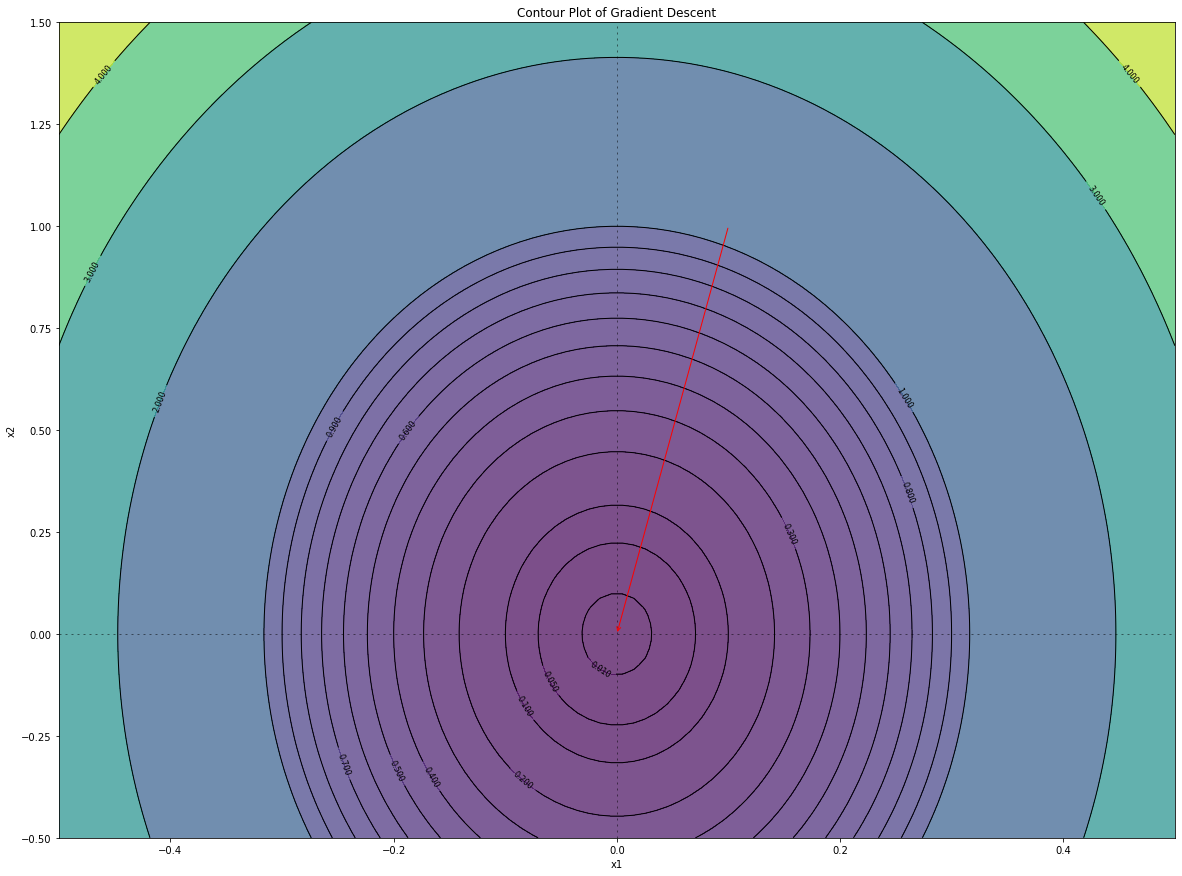

In [5]:
def newtown_step(x_old, H):
    grad = function_5_derivative(x_old)
    x_new = x_old - np.dot(np.linalg.inv(H), grad)
    return x_new
    
def newton_method(acc, x0):
    H=np.array([[20, 0], [0, 2]])
    x_old=x0
    iter_count = 0
    
    while True:
        iter_count+=1
        xs.append(x_old)
        x_new = newtown_step(x_old, H)
        if np.linalg.norm(x_new - x_old) <= acc:
            xs.append(x_new)
            return x_new, iter_count
            break
        x_old = x_new
        
        
xs=[]
acc=0.001
x0=np.array([[0.1], [1]])      

solution, iter_count = newton_method(acc, x0)
print("Approximate solution is (%.5f," %solution[0], "%.5f)." %solution[1], "Found in %s iterations." %iter_count)

plot_grad(xs)

## Task (c)

In [80]:
def CGM(A, x0, acc): #iteratin algorithm for CGM
    
    x_old=x0#setting initial value for x0
    r0 = -function_5_derivative(x_old) #setting value for residual r0
    r_old=r0 #set initial residual and conjugate gradient values
    p_old=r0
    iter=0
    
    while True: #execute method until accuracy achieved
        print("\nIteration number %s" %(iter+1))
        alpha_k=(np.dot(np.transpose(p_old), r_old)).item()/(np.dot(np.transpose(p_old),np.dot(A, p_old))).item() #calculating new alpha_k for current step as per CGM formula
        x_new = x_old + alpha_k*p_old #calculating new value for x based on value of alpha_k calcualted above
        print("Conjugate gradient is p=%s" %p_old.round(5)) #printing out conjugate gradient of current iteration
        r_new = -function_5_derivative(x_new) #calculating new residual
        if (np.linalg.norm(x_new-x_old) < acc): #check if norm of new residual is less than accuracy
            print("\nSolution is %s" %x_new, "found in %s" %(iter+1), "iterations")
            break
        beta = (np.dot(np.transpose(r_new), r_new)).item()/(np.dot(np.transpose(r_old), r_old)).item() #calculating value for beta
        p_new = r_new + beta * p_old #calculating new conjugate gradient to be used on next step
        iter+=1 
        x_old=x_new #updating old values for next iteration
        r_old=r_new
        p_old=p_new

In [81]:
A = np.array([[10, 0], [0, 1]]) #setting matrix A
x0=np.array([[0.1], [1]])  #setting initial value for x0
acc = 0.001 #setting accuracy.

print("Solving system Ax=b from Problem 1 using conjugate gradient method executed untill accuracy %.3f achieved:" %acc)
CGM(A, x0, acc) #executing CGM 

Solving system Ax=b from Problem 1 using conjugate gradient method executed untill accuracy 0.001 achieved:

Iteration number 1
Conjugate gradient is p=[[-2.]
 [-2.]]
3.677685950413224

Iteration number 2
Conjugate gradient is p=[[-2.08264]
 [-8.6281 ]]

Solution is [[-0.26363636]
 [ 0.63636364]] found in 2 iterations
